In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Model SIR

Model SIR z trzech równań modelujących trzy wartości w czasie: 
- S to liczba podatnych na zarażenie (Susceptible)
- I to liczba zainfekowanych (Infectious),
- R to liczba wyleczonych (Recovered).

Równania opisujące model to równania różniczkowe, obrazujące eweolucję SIR w czasie:

$$ \dot{S} = - \beta * I * S $$

$$ \dot{I} = - \beta * I * S - \gamma * I$$

$$ \dot{R} = \gamma * I$$


## Założenia modelu

- populacja Polski N = 38 000 000, jest to jednocześnie liczba S w punkcie startowym,
- początkowa liczba zainfekowanych I0 = 1,
- początkowa liczba wyzdrowiałych R0 = 0,
- współczynnik beta $\beta$ = 0.16,
- współczynnik gamma $\gamma$ = 1/14,
- nie jest możliwe przejście z grupy R do grupy S (tak, wiem, jest to jawna sprzeczność z obserwacją).

### Współczynniki $\beta$ i $\gamma$

Współczynniki $\beta$ i $\gamma$ są oczywiście kluczowe w modelu. 
- $\gamma$ modeluje szybkość kuracji. Ten współczynnik można wyliczyć ze wzoru $ D = 1/\gamma $, gdzie $D$ to liczba dni od infekcji do wyzdoriwenia. 
- $\beta$ jest trudniejsza do oszacowania, ale - jak można przeczytać [tu](http://www.pandemsim.com/data/index.php/make-your-own-sir-model/), $1/\beta$ wyznacza liczbe dni, w których liczba zainfekowanych ulega podwojeniu. Załóżmy, że liczba dni do podwojenia zainfekowanych wynosi 6, to oznacza, że $1/\beta = 6 $, więć po prostym przekształceniu $\beta = 0,16$ 

Są to jedynie szacunki, wspołczynniki te powinno się modelować na danych empirycznych [tak jak tu, bardzo dobry przykłąd w języku R](https://blog.ephorie.de/epidemiology-how-contagious-is-novel-coronavirus-2019-ncov), niemniej według mnie dla Polski jest mało danych.



In [2]:
N = 38000000
I0, R0 = 1, 0
S0 = N - I0 - R0
beta, gamma = 0.16, 1/14

## Czas analizy

Czas można ustawić dowolnie, ja ustawiam na dwieście dni korzystając z funkcji z numpy tworzącej 200 punktów w równych odstepach.

In [3]:
t = np.linspace(0, 400, 400)

## Równania

Poniżej tworzę funkcję sir, w której zamieszczam równania (dzielę je przez N, liczbe populacji, aby uzyskać wyniki procentowe mieszczące się w przedziale (0,1). Funkcja przyjmuje wartości:
- y, czyli wartości początkowe (wektor y0 złożony z Liczby podatnych, zarażonych, wyzdrowiałych) i nastepnie wyliczane z równań óżniczkowych,
- t, czyli przedział czasu (zob. wyżej),
- N, czyli populację,
- współczynniki $\beta$ i $\gamma$ (zob. wyżej).

Następnie używam funkcji odeint z pakietu SciPy aby rozwiązać równania modelu. Rezultatem są trzy wektory przedstwiające eweolucję w czasie liczby S, I, R. 

In [4]:
def sir(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0

result = odeint(sir, y0, t, args=(N, beta, gamma))

S, I, R = result.T

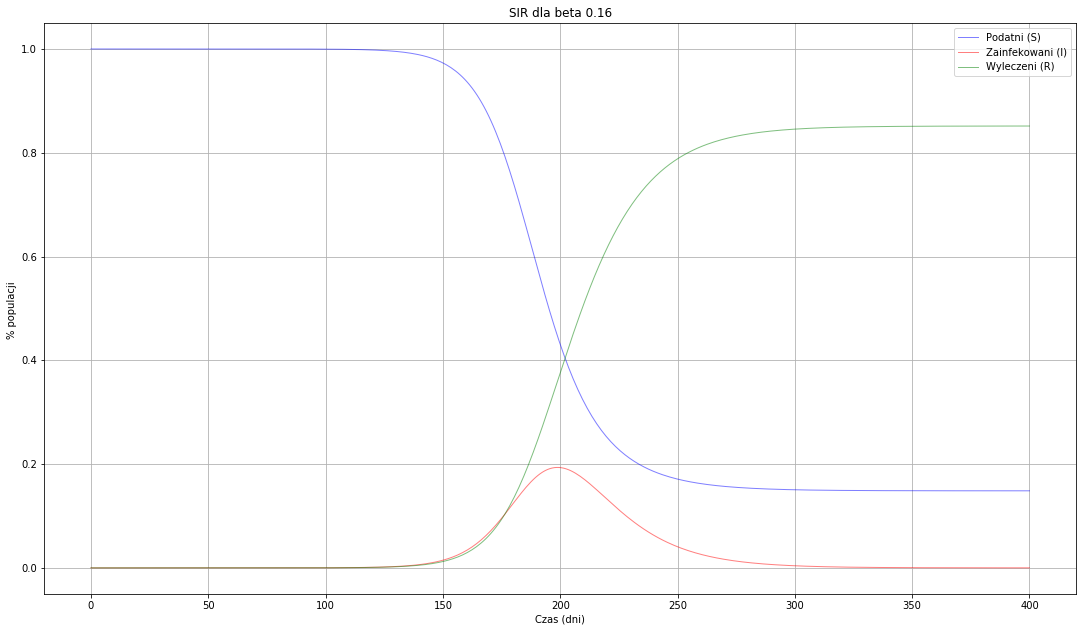

In [5]:
plt.plot(t, S/N, 'b', alpha=0.5, lw=1, label='Podatni (S)')
plt.plot(t, I/N, 'r', alpha=0.5, lw=1, label='Zainfekowani (I)')
plt.plot(t, R/N, 'g', alpha=0.5, lw=1, label='Wyleczeni (R)')
plt.xlabel('Czas (dni)')
plt.ylabel('% populacji ')
plt.legend()
plt.title("SIR dla beta " + str(beta))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.grid()

In [6]:
print("Maksymalna liczba zainfekowanych: " + str(max(I)))

Maksymalna liczba zainfekowanych: 7353432.747131362


Z czego korzystałem:

- z bardzo dobrego bloga, na którym zaprezentowano model SIR dla Niemiec, model w języku R [link](https://blog.ephorie.de/covid-19-the-case-of-germany)

- z tekstu dotyczącego SIR w pythonie, lecz z innym integratorem równań różcznikowych, bardzo ciekawy tekst [link](https://kingaa.github.io/clim-dis/parest/odes.html)

- z tekstu dotyczącego szacowania $\gamma$ i $\beta$ [link](http://www.pandemsim.com/data/index.php/make-your-own-sir-model/)

- ze wspaniałem strony [Learning Scientific Programming with Python](https://scipython.com/), gdzie znajduje się kod dla modelu SIR 